# Project: Metadata Suggesties voor Online Lesmateriaal

##1. Inleiding
In dit ptoject dat we gaan uitvoeren voor de organisatie Wikiwijs is ons doel om metdatasuggesties voor het online lesmateriaal van Wikiwijs te gaan maken. We willen dat ons model uiteindelijk accurate metadata suggesties gaat geven voor het leerjaar, het niveau en het vak.

## 2. Gegevens Onderzoeken en Begrijpen

In deze sectie verkennen we de structuur van onze dataset. We richten ons op JSON-bestanden die lesmateriaal bevatten, specifiek op het bestand vmbo1.json in de submap 'Bio'.

In [1]:
import os
import json
import pandas as pd
# Specificeer het pad naar de submap 'Bio' waar 'vmbo1.json' zich bevindt
directory_path = 'C:/Users/PC/Downloads/json_files/json_files'

# Bestandsnaam van het voorbeeld JSON-bestand
file_name = '13.json'
file_path = os.path.join(directory_path, file_name)

# Lees het JSON-bestand en print de inhoud om de structuur te begrijpen
try:
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        print(json.dumps(data, indent=4))  # Print de inhoud met een nette indeling
except Exception as e:
    print(f"Error bij het lezen van bestand {file_name}: {e}")


{
    "documentAuthors": [
        "Marjolein Kalter"
    ],
    "uuid": null,
    "authors": [
        {
            "fullName": "Marjolein Kalter",
            "referenceName": null,
            "reference": {
                "value": "6"
            },
            "firstName": "Marjolein",
            "infix": "",
            "lastName": "Kalter",
            "emailAddress": "marjolein@anderszins.com",
            "type": "author"
        }
    ],
    "documentDate": "2010-02-08T15:52:23Z",
    "bulkId": "bulk-17041135-refresh_all",
    "identifier": 13,
    "title": "Vormgeven van je arrangement",
    "description": "Instructie hoe de vormgeving van een arrangement aan te passen is",
    "lastModifiedDate": "2010-02-08T15:52:23+01:00",
    "dateCreated": "2009-10-27T17:09:40+01:00",
    "published": true,
    "publisher": null,
    "team": {
        "reference": {
            "value": "wikiwijs_maken_authors"
        },
        "name": "Wikiwijs Maken Auteurs",
        "members": [

**Analyse van vmbo1.json Inhoud**
De JSON-data van vmbo1.json biedt een diepgaand inzicht in het structuur en inhoud van het online lesmateriaal voor het thema "Omgeving" voor vmbo-b12. Hieronder volgt een gedetailleerde analyse van de sleutelcomponenten binnen het bestand:

**Metadata en Auteursinformatie**
Document Auteurs: Het document bevat namen van diverse auteurs, waaronder Pieter Bruring en Sophia Kambakhsh, die bijdragen hebben geleverd aan de inhoud
.

Publicatiedatum: De inhoud is laatst gewijzigd op 25 mei 2023, wat aangeeft dat het materiaal recent is bijgewerkt.


Licentie: Het materiaal valt onder de "CC Naamsvermelding-GelijkDelen 4.0 Internationale licentie", wat betekent dat gebruikers het werk mogen kopiëren, verspreiden, doorgeven, en afgeleide werken mogen maken onder bepaalde voorwaarden.


**Inhoud en Structuur**
Titel: "Thema Omgeving vmbo-b12" geeft duidelijk het onderwerp en het doelpubliek van het lesmateriaal aan.


Beschrijving: Er is een korte inleiding die het thema en de kernonderwerpen beschrijft, zoals levenskenmerken en voedselketens.


Secties: Het document is opgedeeld in verschillende secties, zoals "Intro", "Wat kan ik straks?", en "Wat ga ik doen?", die elk specifieke leerdoelen en activiteiten bevatten. Dit wijst op een gestructureerde benadering om de leerinhoud te presenteren.


**Educatieve Componenten**
Leerdoelen: Voor elke sectie worden specifieke leerdoelen vermeld, zoals het kunnen noemen van negen levenskenmerken en het beschrijven van de begrippen voedselketen en voedselweb.


Opdrachten: Er zijn diverse opdrachten opgenomen met duidelijke instructies en verwachte leeruitkomsten, wat bijdraagt aan een interactieve leerervaring.


Multimedia-inhoud: Het gebruik van afbeeldingen en ingesloten video's verrijkt de tekstuele inhoud en biedt een meer boeiende leerervaring.


**Reflectie en Evaluatie**
Diagnostische toets: Aan het eind van het thema is er een diagnostische toets om de kennis van de leerlingen te evalueren, wat essentieel is voor het beoordelen van het begrip van de leerstof.


Terugkijken: Er is een sectie gewijd aan zelfreflectie, waar leerlingen worden aangemoedigd om na te denken over wat ze hebben geleerd en hoe het proces is verlopen.


**Conclusie**
De inhoud van vmbo1.json toont een goed doordacht en uitgebreid lesmateriaal dat zorgvuldig is ontworpen om vmbo-b12 leerlingen te onderwijzen over het thema "Omgeving". De combinatie van gestructureerde informatie, duidelijke leerdoelen, interactieve opdrachten, en multimedia-inhoud maakt dit een waardevolle bron voor zowel leerlingen als docenten.

##2. Bouw een Input Datapipeline voor Tekst-Preprocessing

We gebruiken BeautifulSoup om HTML-content te verwijderen en reguliere expressies (re) om overbodige spaties te verwijderen. Vervolgens extraheren we de tekst uit elke sectie van onze JSON-bestanden.


In [2]:
from bs4 import BeautifulSoup
import re

def clean_html(raw_html):
    """Functie om HTML-content te verwerken en overbodige spaties te verwijderen."""
    soup = BeautifulSoup(raw_html, "html.parser")
    text = soup.get_text(separator=' ')
    text = re.sub('\s+', ' ', text).strip()
    return text

def extract_text_from_section(section):
    """Functie om inhoud uit secties te halen, inclusief subsecties."""
    text = section.get('heading', {}).get('content', '') + " "
    for item in section.get('items', []):
        text += item.get('content', '') + " "
    for subsection in section.get('sections', []):
        text += extract_text_from_section(subsection)
    return text


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PC\AppData\Local\Temp\ipykernel_11916\520175780.py:8: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip()


Nu we onze functies voor het schoonmaken en extraheren van tekst hebben, kunnen we deze toepassen op onze dataset. We lezen elk JSON-bestand uit onze dataset, extraheren de tekst met behulp van onze functies, en slaan de schone teksten op voor verdere verwerking.




In [3]:
import os
import json

# Map waarin alle vakmappen zijn opgeslagen
directory_path = 'C:/Users/PC/Downloads/json_files/json_files'

# Lijst om alle geëxtraheerde teksten op te slaan
all_texts = []

# Itereren over alle submappen (vakmappen)
for subdir in os.listdir(directory_path):
    subdirectory_path = os.path.join(directory_path, subdir)
    if os.path.isdir(subdirectory_path):
        for filename in os.listdir(subdirectory_path):
            if filename.endswith('.json'):
                file_path = os.path.join(subdirectory_path, filename)
                try:
                    with open(file_path, 'r', encoding='utf-8') as file:
                        data = json.load(file)
                    processed_text = clean_html(extract_text_from_section(data))
                    all_texts.append(processed_text)
                except Exception as e:
                    print(f"Fout bij het verwerken van bestand {filename}: {e}")

# Weergeven van de geëxtraheerde teksten
print(all_texts)


[]


Met deze pipeline voor tekst-preprocessing hebben we nu een schone, gestructureerde tekstinput die kan worden gebruikt voor verdere verwerking, zoals feature extractie of direct in een machine learning model. doordat deze functie iterateert over alle submappen zullen de lessen voor elk vak worden meegenomen.

In [4]:
def compare_texts(raw_html):
    """Functie om de originele en opgeschoonde tekst naast elkaar te tonen."""
    print("Originele Tekst:")
    print(raw_html)
    print("\nOpgeschoonde Tekst:")
    cleaned_text = clean_html(raw_html)
    print(cleaned_text)

# Voorbeeld HTML-tekst
raw_html_example = "<div>Dit is een <b>voorbeeld</b> tekst met <a href='https://example.com'>een link</a> en wat andere <i>HTML</i> elementen.<br />En een nieuwe regel.</div>"

# Vergelijk de originele met de opgeschoonde tekst
compare_texts(raw_html_example)


Originele Tekst:
<div>Dit is een <b>voorbeeld</b> tekst met <a href='https://example.com'>een link</a> en wat andere <i>HTML</i> elementen.<br />En een nieuwe regel.</div>

Opgeschoonde Tekst:
Dit is een voorbeeld tekst met een link en wat andere HTML elementen. En een nieuwe regel.


In [5]:
import tensorflow as tf

# Omzetten van de lijst met opgeschoonde teksten naar een TensorFlow Dataset
texts_dataset = tf.data.Dataset.from_tensor_slices(all_texts)

# Voorbeeld om de eerste paar elementen van de dataset te bekijken
for text in texts_dataset.take(3):
    print(text.numpy())


In [6]:
class ETLPipeline:
    VALID_SUBJECTS = {
        "Aardrijkskunde", "Algemene natuurwetenschappen", "Arabisch", 
        "Audiovisuele vormgeving", "Beeldende vormgeving", "Bewegen, sport en maatschappij", 
        "Biologie", "Chinees", "Culturele en kunstzinnige vorming", 
        "Dans", "Drama", "Duits", "Economie", "Engels", "Filosofie",
        "Frans", "Fries", "Geschiedenis", "Godsdienst", "Grieks", 
        "Handvaardigheid", "Informatica", "Italiaans", "Klassieke culturele vorming", 
        "Kunst algemeen", "Kunst en cultuur", "Latijn", "Levensbeschouwing", 
        "Lichamelijke opvoeding", "Lichamelijke opvoeding (gemeenschappelijk deel)", 
        "Literatuur", "Maatschappijleer", "Maatschappijleer (gemeenschappelijk deel)", 
        "Maatschappijwetenschappen", "Management en organisatie", "Mens en maatschappij", 
        "Mens en natuur", "Muziek", "NaSk", "NaSk1", "NaSk2", 
        "Natuur, leven en technologie", "Natuur- en milieueducatie", "Natuurkunde", 
        "Nederlands", "Nederlands als tweede taal", "Portugees", 
        "Rekenen/wiskunde", "Russisch", "Scheikunde", "Spaans", "Techniek", 
        "Tekenen", "Textiele vormgeving", "Turks", "Verzorging", "Wiskunde A", 
        "Wiskunde B", "Wiskunde C", "Wiskunde D"
    }
    
    def __init__(self, directory_path):
        self.directory_path = directory_path
        self.all_texts = []
        self.vakken = []
        self.leerjaren = []
        self.niveaus = []

    def clean_html(self, raw_html):
        soup = BeautifulSoup(raw_html, "html.parser")
        text = soup.get_text(separator=' ')
        text = re.sub('\s+', ' ', text).strip()
        return text

    def extract_text_from_section(self, section):
        text = section.get('heading', {}).get('content', '') + " "
        for item in section.get('items', []):
            text += item.get('content', '') + " "
        for subsection in section.get('sections', []):
            text += self.extract_text_from_section(subsection)
        return text

    def extract_text(self):
        for subdir, _, files in os.walk(self.directory_path):
            for filename in files:
                if filename.endswith('.json'):
                    file_path = os.path.join(subdir, filename)
                    try:
                        with open(file_path, 'r', encoding='utf-8') as file:
                            data = json.load(file)
                        processed_text = self.clean_html(self.extract_text_from_section(data))
                        self.all_texts.append(processed_text)
                        self.extract_metadata(data)  # Extract metadata
                    except Exception as e:
                        print(f"Error processing file {filename}: {e}")

    def extract_metadata(self, data):
        vakken_set = set()
        leerjaren_set = set()
        niveaus_set = set()

        for term in data.get('colophon', {}).get('metadata', []):
            if not isinstance(term, dict):
                print(f"Issue with metadata entry: {term}")
                continue

            key = term.get('key')
            terms = term.get('terms')

            if key == 'disciplines':
                if terms is not None and isinstance(terms, (dict, list)):
                    if isinstance(terms, dict):
                        elements = terms.values()
                    else:
                        elements = terms
                    for element in elements:
                        vakken_set.update(map(lambda x: x.strip(), element.split(',')))
                else:
                    print(f"Issue with 'disciplines' metadata: {terms}")
            elif key == 'educationalLevels':
                if terms is not None and isinstance(terms, dict):
                    for value in terms.values():
                        if value is not None:
                            leerjaren_set.update(re.findall(r'\b\d+\b', value))
                            levels = map(lambda x: x.strip(), value.split(','))
                            niveaus_set.update(levels)
                else:
                    print(f"Issue with 'educationalLevels' metadata: {terms}")

        vakken_set = vakken_set.intersection(self.VALID_SUBJECTS)
        
        self.vakken.append(', '.join(sorted(vakken_set)))
        self.leerjaren.append(', '.join(sorted(leerjaren_set, key=int)))
        self.niveaus.append(', '.join(sorted(niveaus_set)))
    
    def create_dataframe(self):
        df = pd.DataFrame({'text': self.all_texts, 
                           'vakken': self.vakken, 
                           'leerjaren': self.leerjaren, 
                           'niveaus': self.niveaus})
    
        df = df[df['vakken'] != '']
        return df

# Usage
directory_path = 'C:/Users/PC/Downloads/json_files/json_files'
pipeline = ETLPipeline(directory_path)
pipeline.extract_text()
dataframe = pipeline.create_dataframe()

print(dataframe.head())

<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
C:\Users\PC\AppData\Local\Temp\ipykernel_11916\439298851.py:31: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip()
C:\Users\PC\AppData\Local\Temp\ipykernel_11916\439298851.py:29: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(raw_html, "html.parser")


                                                 text                  vakken  \
1   Geslachtziekten Kennisbank Bestudeer uit de Ke...                Biologie   
4   Plaattektoniek Vooraf In deze opdracht kijk je...          Aardrijkskunde   
6   Inleiding Thema Marktvormen Een consument is d...                Economie   
25  Inleiding Veel leerlingen spelen in hun vrije ...                Techniek   
26  Fictie - Personages Stap 1 Beantwoord de volge...  Literatuur, Nederlands   

   leerjaren                                            niveaus  
1          4  4, VMBO gemengde leerweg, VMBO kaderberoepsger...  
4       1, 2                       HAVO 1, HAVO 2, VWO 1, VWO 2  
6       3, 4  3, 4, VMBO gemengde leerweg, VMBO theoretische...  
25         3  3, VMBO gemengde leerweg, VMBO theoretische le...  
26      1, 2                       HAVO 1, HAVO 2, VWO 1, VWO 2  


In [7]:
dataframe

,text,vakken,leerjaren,niveaus
1,Geslachtziekten Kennisbank Bestudeer uit de Ke...,Biologie,4,"4, VMBO gemengde leerweg, VMBO kaderberoepsger..."
4,Plaattektoniek Vooraf In deze opdracht kijk je...,Aardrijkskunde,"1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2"
6,Inleiding Thema Marktvormen Een consument is d...,Economie,"3, 4","3, 4, VMBO gemengde leerweg, VMBO theoretische..."
25,Inleiding Veel leerlingen spelen in hun vrije ...,Techniek,3,"3, VMBO gemengde leerweg, VMBO theoretische le..."
26,Fictie - Personages Stap 1 Beantwoord de volge...,"Literatuur, Nederlands","1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2"
...,...,...,...,...
13464,Tijd van burgers en stoommachines (TH 2) Parag...,Geschiedenis,2,"2, HAVO 2, VMBO theoretische leerweg"
13469,Zwangerschap Kennisbank Bestudeer uit de Kenni...,Biologie,3,"3, VMBO gemengde leerweg, VMBO kaderberoepsger..."
13470,Vooraf Kennisbank KB : Ontwikkeling in de baar...,Biologie,4,HAVO 4
13473,Geschiedenis vmbo12 De Stercollectie geschiede...,Geschiedenis,"1, 2","1, 2, VMBO gemengde leerweg, VMBO kaderberoeps..."


In [8]:
empty_vakken_rows = dataframe[dataframe['vakken'] == '']
empty_vakken_rows.head(10)



,text,vakken,leerjaren,niveaus


## Kleine EDA

In [9]:
display(dataframe.head())
display(dataframe.info())

,text,vakken,leerjaren,niveaus
1,Geslachtziekten Kennisbank Bestudeer uit de Ke...,Biologie,4,"4, VMBO gemengde leerweg, VMBO kaderberoepsger..."
4,Plaattektoniek Vooraf In deze opdracht kijk je...,Aardrijkskunde,"1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2"
6,Inleiding Thema Marktvormen Een consument is d...,Economie,"3, 4","3, 4, VMBO gemengde leerweg, VMBO theoretische..."
25,Inleiding Veel leerlingen spelen in hun vrije ...,Techniek,3,"3, VMBO gemengde leerweg, VMBO theoretische le..."
26,Fictie - Personages Stap 1 Beantwoord de volge...,"Literatuur, Nederlands","1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2"


<class 'pandas.core.frame.DataFrame'>
Index: 3284 entries, 1 to 13474
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       3284 non-null   object
 1   vakken     3284 non-null   object
 2   leerjaren  3284 non-null   object
 3   niveaus    3284 non-null   object
dtypes: object(4)
memory usage: 128.3+ KB


None

In [10]:
print(dataframe.isnull().sum())


text         0
vakken       0
leerjaren    0
niveaus      0
dtype: int64


we zien dat er geen missende waardes zijn

Wij zien in deze dataframe dat er lessen zijn voor PO, met leerjaar 1-8. Wij willen alleen lessen uit het voortgezet onderwijs.

In [11]:
dataframe.drop(dataframe[dataframe['niveaus'].str.contains('PO groep') | dataframe['niveaus'].str.contains('HBO - Bachelor')].index, inplace=True)
dataframe.drop(dataframe[dataframe['niveaus'].str.contains('PO groep') | dataframe['niveaus'].str.contains('Volwasseneneducatie')].index, inplace=True)
dataframe.drop(dataframe[dataframe['niveaus'].str.contains('PO groep') | dataframe['niveaus'].str.contains('Master')].index, inplace=True)
dataframe.drop(dataframe[dataframe['niveaus'].str.contains('PO groep') | dataframe['niveaus'].str.contains('opleiding')].index, inplace=True)


Nu kunnen we deze PO content uit de dataset halen.

In [12]:
dataframe



,text,vakken,leerjaren,niveaus
1,Geslachtziekten Kennisbank Bestudeer uit de Ke...,Biologie,4,"4, VMBO gemengde leerweg, VMBO kaderberoepsger..."
4,Plaattektoniek Vooraf In deze opdracht kijk je...,Aardrijkskunde,"1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2"
6,Inleiding Thema Marktvormen Een consument is d...,Economie,"3, 4","3, 4, VMBO gemengde leerweg, VMBO theoretische..."
25,Inleiding Veel leerlingen spelen in hun vrije ...,Techniek,3,"3, VMBO gemengde leerweg, VMBO theoretische le..."
26,Fictie - Personages Stap 1 Beantwoord de volge...,"Literatuur, Nederlands","1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2"
...,...,...,...,...
13464,Tijd van burgers en stoommachines (TH 2) Parag...,Geschiedenis,2,"2, HAVO 2, VMBO theoretische leerweg"
13469,Zwangerschap Kennisbank Bestudeer uit de Kenni...,Biologie,3,"3, VMBO gemengde leerweg, VMBO kaderberoepsger..."
13470,Vooraf Kennisbank KB : Ontwikkeling in de baar...,Biologie,4,HAVO 4
13473,Geschiedenis vmbo12 De Stercollectie geschiede...,Geschiedenis,"1, 2","1, 2, VMBO gemengde leerweg, VMBO kaderberoeps..."


C:\Users\PC\AppData\Local\Temp\ipykernel_11916\3207043549.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


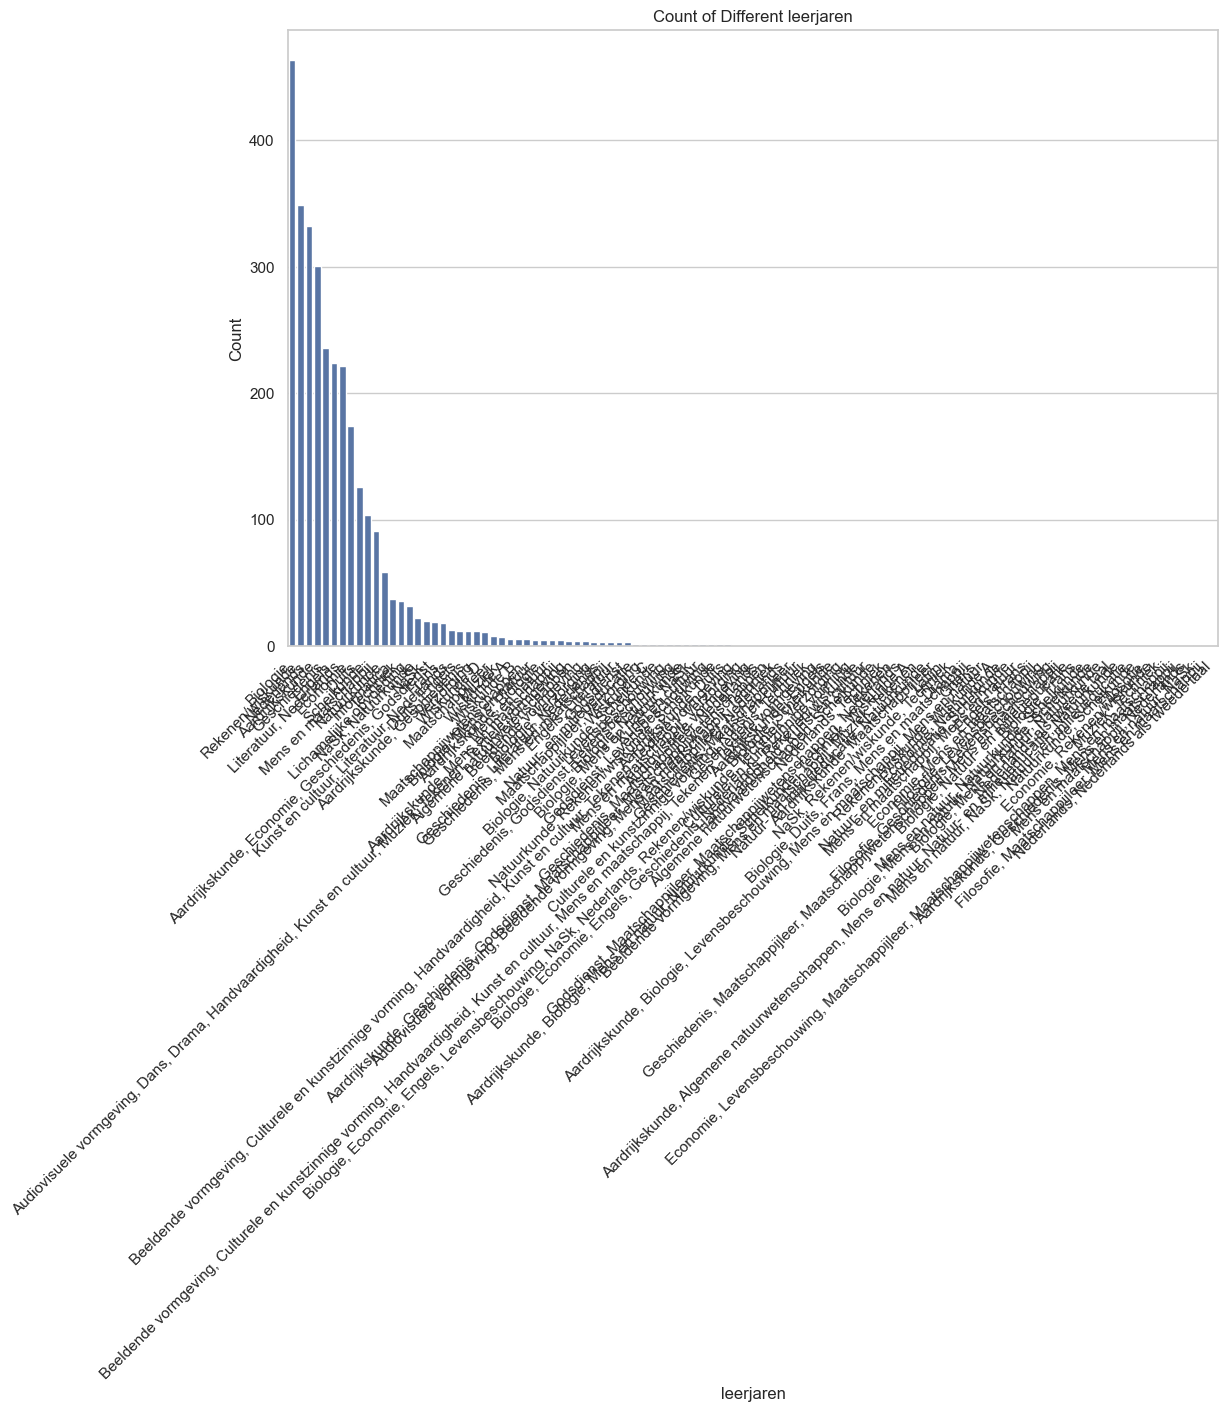

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=dataframe, x='vakken', order=dataframe['vakken'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.xlabel('leerjaren')
plt.ylabel('Count')
plt.title('Count of Different leerjaren')
plt.tight_layout()
plt.show()


hier zien we dat de sommige vakken samen zitten en dan moeten we niet hebben.

In [14]:
vakken_list = dataframe['vakken'].unique()
print(vakken_list)


['Biologie' 'Aardrijkskunde' 'Economie' 'Techniek'
 'Literatuur, Nederlands' 'Geschiedenis' 'Scheikunde' 'Nederlands'
 'Engels' 'Mens en maatschappij' 'Godsdienst' 'Rekenen/wiskunde' 'NaSk'
 'Informatica' 'Duits' 'Grieks'
 'Aardrijkskunde, Biologie, Levensbeschouwing, Mens en maatschappij, Mens en natuur'
 'Natuurkunde, Rekenen/wiskunde, Scheikunde' 'Frans' 'Natuurkunde'
 'Lichamelijke opvoeding' 'NaSk, Natuurkunde' 'Aardrijkskunde, Duits'
 'Verzorging' 'Maatschappijleer' 'Engels, Literatuur'
 'Aardrijkskunde, Biologie' 'Aardrijkskunde, Geschiedenis'
 'Rekenen/wiskunde, Wiskunde A' 'Economie, Natuurkunde' 'Muziek'
 'Natuur- en milieueducatie, Scheikunde'
 'Aardrijkskunde, Mens en maatschappij'
 'Mens en maatschappij, Mens en natuur' 'Kunst en cultuur'
 'Biologie, Verzorging' 'Engels, Frans' 'Economie, Mens en maatschappij'
 'Biologie, Mens en natuur, NaSk'
 'Geschiedenis, Godsdienst, Levensbeschouwing'
 'Godsdienst, Levensbeschouwing' 'Filosofie, Levensbeschouwing'
 'Audiovisuele vormg

hier maken we met behulp van een fuctie een nieuwe kolom aan waar de vakken niet samen zitten.

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

valid_subjects = [
    "Aardrijkskunde", "Algemene natuurwetenschappen", "Arabisch", 
    "Audiovisuele vormgeving", "Beeldende vormgeving", "Bewegen, sport en maatschappij", 
    "Biologie", "Chinees", "Culturele en kunstzinnige vorming", 
    "Dans", "Drama", "Duits", "Economie", "Engels", "Filosofie",
    "Frans", "Fries", "Geschiedenis", "Godsdienst", "Grieks", 
    "Handvaardigheid", "Informatica", "Italiaans", "Klassieke culturele vorming", 
    "Kunst algemeen", "Kunst en cultuur", "Latijn", "Levensbeschouwing", 
    "Lichamelijke opvoeding", "Literatuur", "Maatschappijleer", 
    "Maatschappijwetenschappen", "Management en organisatie", "Mens en maatschappij", 
    "Mens en natuur", "Muziek", "NaSk", "NaSk1", "NaSk2", 
    "Natuur, leven en technologie", "Natuur- en milieueducatie", "Natuurkunde", 
    "Nederlands", "Portugees", "Rekenen/wiskunde", 
    "Russisch", "Scheikunde", "Spaans", "Techniek", 
    "Tekenen", "Textiele vormgeving", "Turks", "Verzorging", 
    "Wiskunde A", "Wiskunde B", "Wiskunde C", "Wiskunde D"
]

def clean_vakken(vakken_list, valid_subjects):
    cleaned_vakken = []
    for vakken in vakken_list:
        subjects = [sub.strip() for sub in vakken.split(",")]
        found_subject = None
        for subject in subjects:
            if subject in valid_subjects:
                found_subject = subject
                break  
        if found_subject:
            cleaned_vakken.append(found_subject)
        else:
            cleaned_vakken.append(None)  
    return cleaned_vakken

#toepassen 
dataframe['cleaned_vakken'] = clean_vakken(dataframe['vakken'].tolist(), valid_subjects)

#filter
dataframe = dataframe.dropna(subset=['cleaned_vakken'])

 

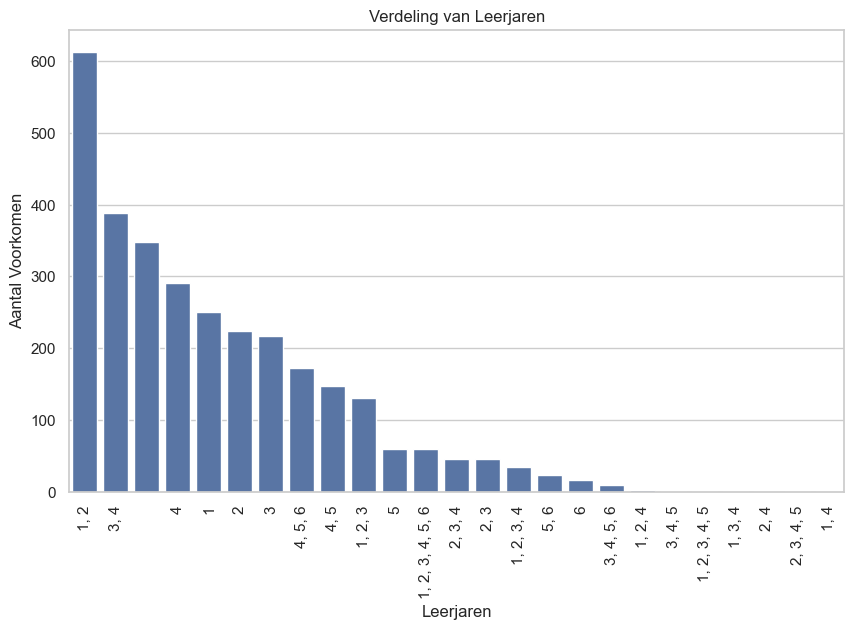

In [34]:
# Uitpakken van de leerjaren lijst en tellen
df_leerjaren = dataframe.explode('leerjaren')
leerjaar_count = df_leerjaren['leerjaren'].value_counts()

# Barplot van leerjaren
plt.figure(figsize=(10, 6))
sns.barplot(x=leerjaar_count.index, y=leerjaar_count.values)
plt.title('Verdeling van Leerjaren')
plt.xlabel('Leerjaren')
plt.ylabel('Aantal Voorkomen')
plt.xticks(rotation=90)
plt.show()

hier splitsen we de leerjaren en niveaus 

In [25]:
dataframe.loc[:, 'leerjaren_split'] = dataframe['leerjaren'].apply(lambda x: [int(y.strip()) for y in x.split(',') if y.strip()])
dataframe.loc[:, 'niveaus_split'] = dataframe['niveaus'].apply(lambda x: [y.strip() for y in x.split(',')])



C:\Users\PC\AppData\Local\Temp\ipykernel_11916\2342299225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:, 'leerjaren_split'] = dataframe['leerjaren'].apply(lambda x: [int(y.strip()) for y in x.split(',') if y.strip()])
C:\Users\PC\AppData\Local\Temp\ipykernel_11916\2342299225.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.loc[:, 'niveaus_split'] = dataframe['niveaus'].apply(lambda x: [y.strip() for y in x.split(',')])


In [26]:
dataframe

,text,vakken,leerjaren,niveaus,cleaned_vakken,leerjaren_split,niveaus_split
1,Geslachtziekten Kennisbank Bestudeer uit de Ke...,Biologie,4,"4, VMBO gemengde leerweg, VMBO kaderberoepsger...",Biologie,[4],"[4, VMBO gemengde leerweg, VMBO kaderberoepsge..."
4,Plaattektoniek Vooraf In deze opdracht kijk je...,Aardrijkskunde,"1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2",Aardrijkskunde,"[1, 2]","[HAVO 1, HAVO 2, VWO 1, VWO 2]"
6,Inleiding Thema Marktvormen Een consument is d...,Economie,"3, 4","3, 4, VMBO gemengde leerweg, VMBO theoretische...",Economie,"[3, 4]","[3, 4, VMBO gemengde leerweg, VMBO theoretisch..."
25,Inleiding Veel leerlingen spelen in hun vrije ...,Techniek,3,"3, VMBO gemengde leerweg, VMBO theoretische le...",Techniek,[3],"[3, VMBO gemengde leerweg, VMBO theoretische l..."
26,Fictie - Personages Stap 1 Beantwoord de volge...,"Literatuur, Nederlands","1, 2","HAVO 1, HAVO 2, VWO 1, VWO 2",Literatuur,"[1, 2]","[HAVO 1, HAVO 2, VWO 1, VWO 2]"
...,...,...,...,...,...,...,...
13464,Tijd van burgers en stoommachines (TH 2) Parag...,Geschiedenis,2,"2, HAVO 2, VMBO theoretische leerweg",Geschiedenis,[2],"[2, HAVO 2, VMBO theoretische leerweg]"
13469,Zwangerschap Kennisbank Bestudeer uit de Kenni...,Biologie,3,"3, VMBO gemengde leerweg, VMBO kaderberoepsger...",Biologie,[3],"[3, VMBO gemengde leerweg, VMBO kaderberoepsge..."
13470,Vooraf Kennisbank KB : Ontwikkeling in de baar...,Biologie,4,HAVO 4,Biologie,[4],[HAVO 4]
13473,Geschiedenis vmbo12 De Stercollectie geschiede...,Geschiedenis,"1, 2","1, 2, VMBO gemengde leerweg, VMBO kaderberoeps...",Geschiedenis,"[1, 2]","[1, 2, VMBO gemengde leerweg, VMBO kaderberoep..."


In [18]:
dataframe['text']

1        Geslachtziekten Kennisbank Bestudeer uit de Ke...
4        Plaattektoniek Vooraf In deze opdracht kijk je...
6        Inleiding Thema Marktvormen Een consument is d...
25       Inleiding Veel leerlingen spelen in hun vrije ...
26       Fictie - Personages Stap 1 Beantwoord de volge...
                               ...                        
13464    Tijd van burgers en stoommachines (TH 2) Parag...
13469    Zwangerschap Kennisbank Bestudeer uit de Kenni...
13470    Vooraf Kennisbank KB : Ontwikkeling in de baar...
13473    Geschiedenis vmbo12 De Stercollectie geschiede...
13474    Aardrijkskunde vmbo12 De Stercollectie aardrij...
Name: text, Length: 3087, dtype: object

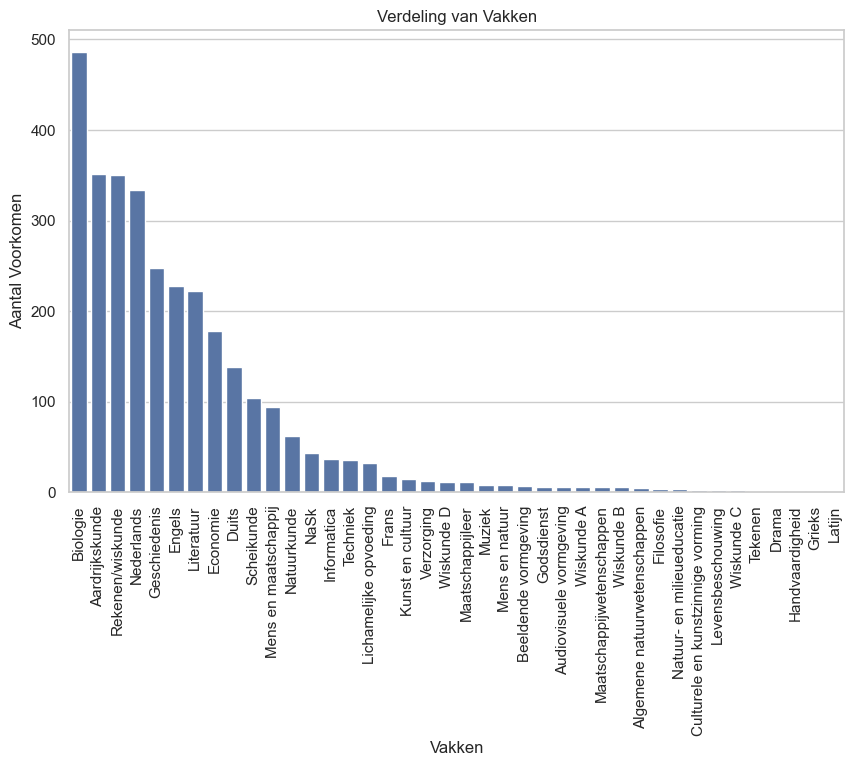

In [19]:


# Tellen van het aantal voorkomen van elk vak
vak_count = dataframe['cleaned_vakken'].value_counts()

# Barplot van vakken
plt.figure(figsize=(10, 6))
sns.barplot(x=vak_count.index, y=vak_count.values)
plt.title('Verdeling van Vakken')
plt.xlabel('Vakken')
plt.ylabel('Aantal Voorkomen')
plt.xticks(rotation=90)
plt.show()


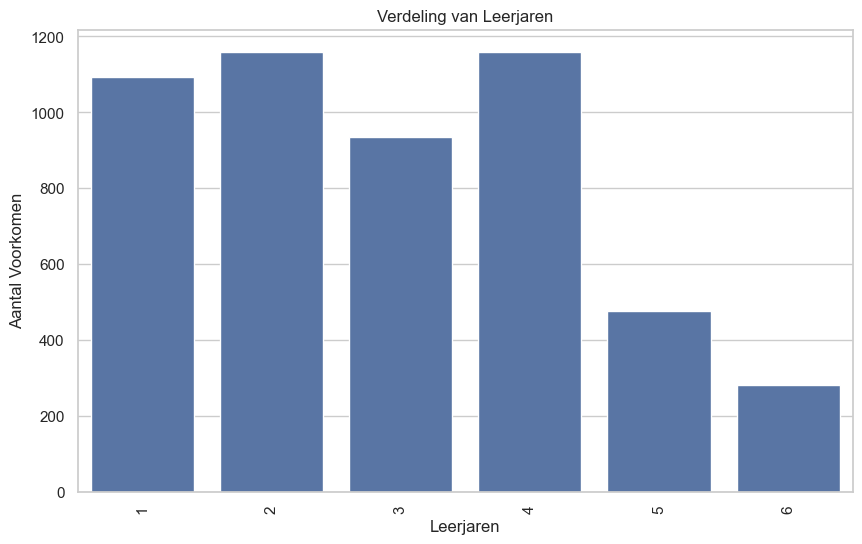

In [27]:
# Uitpakken van de leerjaren lijst en tellen
df_leerjaren = dataframe.explode('leerjaren_split')
leerjaar_count = df_leerjaren['leerjaren_split'].value_counts()

# Barplot van leerjaren
plt.figure(figsize=(10, 6))
sns.barplot(x=leerjaar_count.index, y=leerjaar_count.values)
plt.title('Verdeling van Leerjaren')
plt.xlabel('Leerjaren')
plt.ylabel('Aantal Voorkomen')
plt.xticks(rotation=90)
plt.show()


We zien dat veel jeerlaren samen zijn (1,2)

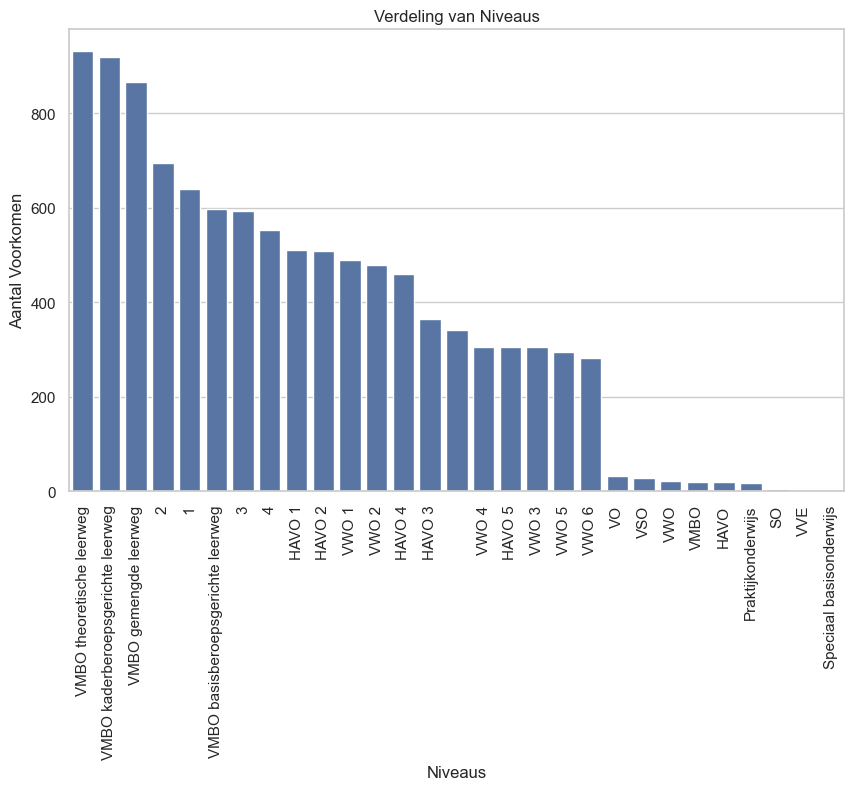

In [28]:
# Uitpakken van de niveaus lijst en tellen
df_niveaus = dataframe.explode('niveaus_split')
niveau_count = df_niveaus['niveaus_split'].value_counts()

# Barplot van niveaus
plt.figure(figsize=(10, 6))
sns.barplot(x=niveau_count.index, y=niveau_count.values)
plt.title('Verdeling van Niveaus')
plt.xlabel('Niveaus')
plt.ylabel('Aantal Voorkomen')
plt.xticks(rotation=90)
plt.show()


# Keywords van Vakken

Geen idee of we keywords nodig hebben (nog nooit mee gewerkt). ff opletten dat die niet hele tijd biologie voorspelt door die keywords

Aangezien onze traindata alleen vo-content is worden de voorspellingen ook gedaan op de vakken van vo-content. Onze data bevat ook andere vakken zoals dans, muziek, wiskunde A,B,C,D, spaans, tekenen, enzovoort. Deze komen allen uit de officiele vakken lijst, vakken.json.

Wij moeten dus bepalen of we deze keywords op basis doen van VO-content vakken of die van de officiele vakkenlijst. Accuracy gaat uiteraard omhoog wanneer we dit doen op de lijst van vo-content.

In [35]:
# Luca
biologie_keywords = ['omgeving', 'ordenen', 'blessures', 'organismen', 'geraamte', 'beenderen', 'lichaamshouding', 'zintuigen', 'zenuwstelsel', 'ogen', 'fotosynthese', 'voortplanting', 'zaad', 'eetgewoontes', 'voedingsstoffen', 'spijsvertering', 'ademhaling', 'seksualiteit', 'menstruatie', 'erfelijkheid', 'evolutie', 'celdeling', 'milieu', 'orgaan', 'zaadplanten', 'verbranding', 'voedselweb', 'overlevingsstrategieen', 'verteren', 'verkouden', 'ademhalingsstelsel', 'impulsen', 'zenuwstelsel', 'infectie', 'hartvaten', 'bloedvaten', 'hersenen', 'geraamte', 'beenverbindingen', 'spieren', 'menstruatiecyclus', 'geslachtsziekten', 'zwangerschap', 'voorbehoedsmiddelen', 'zwangerschap', 'skelet', 'ademhaling', 'natuur', 'hygiene', 'biologie', 'biotechnologie', 'levenskenmerken', 'ecosysteem', 'voedselweb', 'voedselketen', 'diergedrag', 'beenderen', 'bestuiving', 'spijsvertering', 'gebit', 'ademhaling', 'longziekten', 'kanker', 'afweersysteem', 'bloedtransfusies', 'broeikaseffect', 'afvalvertering', 'weefsel', 'dissimilatie', 'plantenweefsels', 'bloedsomloop', 'lymfe', 'nieren', 'skelet', 'schimmel', 'hormonen', 'infectie', 'bacterie', 'biotisch', 'erfelijk', 'mitose', 'meiose', 'monohybride', 'gedragsonderzoek', 'duurzaamheid', 'milieuvervuiling', 'bestuiving', 'diergedrag', 'ademhaling', 'bloed', 'erfelijkheid', 'broeikaseffect', 'schimmels', 'verloskundige', 'ziekenhuis', 'verpleegkundige', 'hormonen', 'anabolen', 'oogarts', 'neuroloog', 'revalidatiearts', 'eukaryoot', 'geneticus', 'hartklopping', 'osmoregulatie' ]
duits_keywords = [ 'deutsche', 'sprache', 'grammatik', 'konjugation', 'verben', 'nomen', 'adjektive', 'artikel', 'zeitformen', 'perfekt', 'imperfekt', 'präteritum', 'plusquamperfekt', 'kommaregeln', 'satzbau', 'wortschatz', 'redewendungen', 'aussprache', 'lesen', 'schreiben', 'sprechen', 'hören', 'komposition', 'aufsatz', 'textanalyse', 'lyrik', 'prosa', 'drama', 'literatur', 'schriftsteller', 'dichter', 'leseverstehen', 'hörverstehen', 'dialog', 'diskussion', 'referat', 'präsentation', 'diktat', 'wortbildung', 'synonyme', 'antonyme', 'falsche freunde', 'idiomatik', 'präpositionen', 'konjunktion', 'adverbien', 'pronomen', 'modalverben', 'imperativ', 'subjunktiv', 'indikativ', 'passiv', 'aktiv', 'rechtschreibung', 'schriftliche kommunikation', 'mündliche kommunikation', 'landeskunde', 'deutschland', 'österreich', 'schweiz', 'kultur', 'geschichte', 'gesellschaft', 'politik', 'wirtschaft', 'geografie', 'tourismus', 'bräuche', 'feste', 'traditionen', 'musik', 'kunst', 'film', 'theater', 'kulinarik', 'architektur', 'epochen', 'reformation', 'aufklärung', 'romantik', 'expressionismus', 'moderne', 'postmoderne', 'vergangenheit', 'gegenwart', 'zukunft', 'medien', 'zeitungen', 'zeitschriften', 'internet', 'soziale netzwerke', 'süddeutsche zeitung', 'frankfurter allgemeine', 'spiegel', 'focus', 'tagesschau', 'deutsche welle', 'bildbeschreibung', 'erörterung', 'interpretation', 'rezension', 'buchbesprechung', 'kollokation' ]
eco_keywords = ['economie', 'uitgaven', 'budget', 'inkomstenbronnen', 'inkomensverschillen', 'budget', 'productiefactoren', 'vraag en aanbod', 'bedrijfskosten', 'marketingmix', 'koopgedrag', 'lenen', 'hypotheek', 'onderhandelen', 'verzekering', 'onderneming', 'vennootschap', 'monopolie', 'economische groei', 'arbeidsmarkt', 'break-even', 'valuta', 'werkloosheid', 'inflatie', 'warenonderzoek', 'arbeidsovereenkomst', 'minimumloon', 'werknemer', 'werkgever', 'uitgaven', 'ontwikkelingslanden', 'productiefactoren', 'bedrijfskosten', 'koopgedrag', 'koopovereenkomst', 'werkgelegenheid', 'arbeidsmarkt', 'arbeidsverhoudingen', 'indexcijfers', 'minimumjeugdloon', 'kapitaal', 'betalingsbalans', 'crypto', 'hypotheekvormen', 'omzet', 'afzet', 'winst', 'reclame', 'reisverzekering', 'overschot', 'belasting', 'belastingsysteem', 'vergrijzing', 'aow', 'gevangenendilemma', 'collectieve sector', 'bruto binnenlands product', 'bruto buitenlands product', 'koopkracht', 'budgetlijn', 'marktvormen', 'surplus', 'beleggen', 'vermogensmarkt', 'conjunctuur']
mn_keywords = ['']

# Sami
eng_keywords = ['Engels', 'tekstanalyse', 'tekstbegrip', 'tekststructuur', 'literatuur', 'tekstsoorten', 'poëzie', 'proza', 'drama', 'literaire analyse', 'literaire termen', 'interpretatie', 'vertaling', 'vertaalvaardigheden', 'interpretatieve vaardigheden', 'citaat', 'context', 'plot', 'karakter', 'thema', 'stijl', 'setting', 'vertelperspectief', 'ironie', 'symboliek', 'figuurlijk taalgebruik', 'vergelijking', 'metafoor', 'personificatie', 'stijlfiguur', 'literair apparaat', 'literaire conventie', 'literaire stroming', 'literaire periode', 'klassiekers', 'romans', 'dichtbundels', 'toneelstukken', 'toneelteksten', 'vertalingen', 'letterkunde', 'Engelse literatuur', 'Amerikaanse literatuur', 'Britse literatuur', 'wereldliteratuur', 'literaire canon', 'literaire kritiek', 'literaire geschiedenis', 'literaire stijl', 'literaire analyse', 'schrijverschap', 'auteur', 'biografie', 'auteurschap', 'literaire context', 'historische context', 'culturele context', 'academisch Engels', 'formele Engelse taal', 'academische schrijfstijl', 'essay', 'academisch onderzoek', 'referenties', 'bibliografie', 'bronvermelding', 'citatie', 'peer review', 'literatuuronderzoek', 'bronnenonderzoek', 'bronnenanalyse', 'academisch Engels', 'discoursgemeenschap', 'academische conventies', 'academische terminologie', 'academische presentatie', 'argumentatie', 'discussie', 'debat', 'spreken in het openbaar', 'onderhandeling', 'diplomatie', 'retoriek', 'argumentatieve vaardigheden', 'overredingskracht', 'debatteren', 'onderzoeksrapport', 'presentatie', 'academische presentatie', 'spreekbeurt', 'publiek spreken', 'presentatietechnieken', 'publiek overtuigen', 'discussie leiden', 'tekstinterpretatie', 'culturele analyse', 'interculturele communicatie', 'taalverwerving', 'tweede taalverwerving', 'taalonderwijs', 'taalexamens', 'taalniveaus', 'Cambridge Engels', 'Engelse taalvaardigheid', 'Engelse taalvaardigheidstests']
geschiedenis_keywords = ['prehistorie', 'oude beschavingen', 'prehistorische kunst', 'mesopotamie', 'sumeriers', 'egypte', 'farao', 'pyramides', 'hierogliefen', 'indus-vallei', 'mohenjo-daro', 'hindoeïsme', 'vedas', 'india', 'boeddhisme', 'siddhartha gautama', 'confucianisme', 'confucius', 'china', 'griekenland', 'rome', 'romeinse rijk', 'julius caesar', 'keizer augustus', 'pax romana', 'hellenistische periode', 'alexander de grote', 'byzantijnse rijk', 'constantinopel', 'islam', 'profeet mohammed', 'koran', 'jihad', 'kalifaat', 'middeleeuwen', 'feodalisme', 'kruistochten', 'zwarte dood', 'renaissance', 'leonardo da vinci', 'machiavelli', 'reformatie', 'martin luther', 'protestantisme', 'contrareformatie', 'verlichting', 'voltaire', 'montesquieu', 'franse revolutie', 'napoleon bonaparte', 'industriële revolutie', 'kapitalisme', 'socialisme', 'communisme', 'wereldoorlog i', 'wereldoorlog ii', 'holocaust', 'koude oorlog', 'berlijnse muur', 'dekolonisatie', 'apartheid', 'vietnamoorlog', 'burgerrechtenbeweging', 'maanlanding', 'val van de muur', 'globalisering', 'terrorisme', 'september 11', 'oorlog in syrië', 'klimaatverandering', 'opkomst van het internet', 'sociale media', 'technologische revolutie']
informatica_keywords = ['algoritme', 'programmeren', 'datastructuur', 'computerarchitectuur', 'softwareontwikkeling', 'hardware', 'besturingssysteem', 'netwerken', 'database', 'webontwikkeling', 'programmeertalen', 'objectgeoriënteerd programmeren', 'gegevensanalyse', 'machine learning', 'artificial intelligence', 'neurale netwerken', 'big data', 'cybersecurity', 'cryptografie', 'computervisie', 'robotica', 'cloud computing', 'internet of things', 'blockchain', 'virtuele realiteit', 'augmented reality', 'data mining', 'bio-informatica', 'quantum computing', 'ethisch hacken', 'computersimulatie', 'gebruikersinterface', 'compiler', 'debuggen', 'versiebeheer', 'agile methodologie', 'software-engineering', 'parallel programmeren', 'quantum computing', 'computerspelontwikkeling', 'embedded systems', 'computeralgebra', 'algoritmische handel', 'informatietheorie', 'gegevenscompressie', 'bio-informatica', 'sociale netwerkanalyse', 'computernetwerkbeveiliging', 'digitale forensica', 'mobiele app-ontwikkeling', 'computernetwerken', 'bestandssystemen', 'cloud computing-modellen', 'parallelle verwerking', 'machine learning-algoritmen', 'data warehousing', 'computergraphics', 'compilerbouw', 'computational linguistics', 'gegevensvisualisatie', 'neurale netwerkarchitecturen', 'bio-informatica-algoritmen', 'quantumalgoritmen', 'data science-methoden', 'ethische kwesties in informatica']
natuurkunde_keywords = ['kracht', 'beweging', 'energie', 'zwaartekracht', 'elektriciteit', 'magnetisme', 'licht', 'geluid', 'warmte', 'thermodynamica', 'kinetische energie', 'potentiële energie', 'wetten van Newton', 'elektromagnetisme', 'relativiteitstheorie', 'kwantummechanica', 'golffunctie', 'atoomstructuur', 'kernfysica', 'radioactiviteit', 'quantumveldentheorie', 'kosmologie', 'donkere materie', 'donkere energie', 'astrofysica', 'sterrenkunde', 'zonsverduistering', 'maansverduistering', 'kosmische straling', 'zwarte gaten', 'neutronensterren', 'kosmische achtergrondstraling', 'Higgs-boson', 'deeltjesfysica', 'fundamentele krachten', 'elektromagnetische golven', 'breking', 'diffractie', 'interferentie', 'optica', 'spiegelbeeldsymmetrie', 'relativiteit', 'tijdreizen', 'quantumverstrengeling', 'heisenberg onzekerheidsprincipe', 'fotonen', 'elektronen', 'atomen', 'moleculen', 'geleiding', 'supergeleiding', 'kwantumcomputing', 'fotovoltaïsche cellen', 'thermische energieomzetting', 'energieopwekking', 'energieopslag', 'kernreactoren', 'fossiele brandstoffen', 'duurzame energie', 'windenergie', 'zonne-energie', 'geothermische energie', 'brandstofceltechnologie', 'energie-efficiëntie', 'energietransport', 'warmteoverdracht', 'geluidsgolven', 'resonantie', 'dopplereffect', 'geluidsisolatie', 'warmtecapaciteit', 'warmteoverdracht', 'thermische isolatie', 'gaswetten', 'kinetische theorie van gassen', 'Brownse beweging', 'entropie', 'warmtepompen', 'thermische dynamica', 'faseovergangen', 'kernfusie', 'kernsplijting', 'quantumzwaartekracht', 'kwantumveldentheorie', 'snaartheorie', 'm-theorie', 'extra dimensies', 'multiversum', 'kosmische inflatie', 'kosmische expansie', 'donkere materie', 'donkere energie', 'oerknal', 'kosmologische constante']

# Jesse 180 cm
ned_keywords = ['grammatica', 'spelling', 'werkwoord', 'zelfstandig naamwoord', 'bijvoeglijk naamwoord', 'voorzetsel', 'bijwoord', 'zinsontleding', 'woordenschat', 'synoniem', 'antoniem', 'woordsoorten', 'zinsdelen', 'persoonlijk voornaamwoord', 'bezittelijk voornaamwoord', 'betrekkelijk voornaamwoord', 'literaire termen', 'poëzie', 'proza', 'drama', 'novelle', 'roman', 'kort verhaal', 'fabel', 'mythe', 'sprookje', 'epiek', 'lyriek', 'dramatiek', 'rijm', 'metrum', 'strofe', 'versregel', 'alliteratie', 'assonantie', 'metafoor', 'vergelijking', 'personificatie', 'hyperbool', 'understatement', 'ironie', 'sarcasme', 'stijlfiguren', 'beeldspraak', 'argumentatie', 'betogende tekst', 'beschouwende tekst', 'uiteenzettende tekst', 'inleiding', 'kern', 'slot', 'samenvatten', 'paraferen', 'tekststructuren', 'informatieve tekst', 'informatieve tekst', 'vertellende tekst', 'overtuigende tekst', 'activerende tekst', 'instruerende tekst', 'leesstrategieën', 'voorspellend lezen', 'globaal lezen', 'intensief lezen', 'kritisch lezen' ]
sk_keywords = ['atoom', 'molecuul', 'element', 'verbinding', 'chemische reactie', 'reactievergelijking',  'periodiek systeem', 'atoomnummer', 'massagetal', 'proton', 'neutron', 'elektron', 'valentie-elektron',  'ion', 'isotoop', 'kation', 'anion', 'molecuulformule', 'structuurformule', 'covalente binding',  'ionbinding', 'metaalbinding', 'polair', 'apolair', 'waterstofbrug', 'intermoleculaire krachten', 'stoichiometrie', 'mol', 'molaire massa', 'concentratie', 'oplossing', 'oplosmiddel', 'opgeloste stof', 'zure oplossing', 'basische oplossing', 'pH', 'neutralisatiereactie', 'titratie', 'indicator', 'zout', 'zoutoplossing', 'redoxreactie', 'oxidator', 'reductor', 'elektrolyse', 'elektrochemische cel', 'galvanische cel', 'halfreactie', 'oxidatie', 'reductie', 'activeringsenergie', 'katalysator', 'reactiesnelheid', 'evenwichtsreactie', 'chemisch evenwicht', 'Le Chatelier', 'druk', 'temperatuur', 'concentratieverandering', 'gaswetten', 'ideale gaswet', 'Boyle', 'Charles', 'Gay-Lussac', 'Avogadro', 'gassen', 'vloeistoffen', 'vaste stoffen', 'faseovergang', 'sublimatie', 'condenseren', 'verdampen', 'smelten', 'stollen', 'mengsel', 'zuivere stof', 'destillatie', 'filtratie', 'chromatografie', 'extractie', 'adsorptie', 'destillaat', 'residu', 'precipitatie', 'neerslagreactie', 'scheidingsmethode', 'carbonchemie', 'koolstofverbinding', 'alkaan', 'alkeen', 'alkyn', 'aromaat', 'alkohol', 'ether', 'aldehyde', 'keton', 'carboxylzuur', 'ester', 'amine', 'amide', 'polymeer', 'monomeer', 'kunststof', 'biochemie', 'enzym', 'eiwit', 'vet', 'koolhydraat', 'nucleotide', 'DNA', 'RNA', 'biomolecuul', 'metabolisme', 'cellulose', 'stijfsel', 'glucose', 'fructose', 'sacharose', 'lactose', 'chemische industrie', 'milieukunde', 'duurzaamheid', 'green chemistry', 'hernieuwbare energie', 'fossiele brandstoffen']
wisk_keywords =['getal', 'optellen', 'aftrekken', 'vermenigvuldigen', 'delen', 'breuk', 'decimaal', 'procent', 'ratio', 'verhouding', 'machtsverheffen', 'worteltrekken', 'volgorde van bewerkingen', 'bewijs', 'axioma', 'stelling', 'meetkunde', 'punt', 'lijn', 'vlak', 'hoek', 'driehoek', 'vierhoek', 'cirkel', 'ellips', 'parallel', 'loodrecht', 'evenwijdig', 'congruent', 'gelijkvormig', 'symmetrie', 'translatie', 'rotatie', 'spiegeling', 'reflexie', 'coördinaten', 'assenstelsel', 'grafiek', 'functie', 'vergelijking', 'ongelijkheid', 'parabool', 'hyperbool', 'exponentiële functie', 'logaritmische functie', 'sinusfunctie', 'cosinusfunctie', 'tangensfunctie', 'differentiaalrekening', 'afgeleide', 'limiet', 'continuïteit', 'integraalrekening', 'bepaalde integraal', 'onbepaalde integraal', 'sommatie', 'reeks', 'limiet van een rij', 'meetkundige reeks', 'convergentie', 'divergentie', 'differentiaalvergelijking', 'lineaire algebra', 'matrix', 'vector', 'eigenwaarde', 'eigenvector', 'lineaire vergelijking', 'determinant', 'vectorruimte', 'scalair product', 'vectorproduct', 'lineaire transformatie', 'stelsel van lineaire vergelijkingen', 'gauss-eliminatie', 'kronecker-delta', 'combinatoriek', 'permutatie', 'combinatie', 'kansrekening', 'kans', 'waarschijnlijkheid', 'kansverdeling', 'normale verdeling', 'binomiale verdeling', 'hypergeometrische verdeling', 'poissonverdeling', 'kansfunctie', 'statistiek', 'steekproef', 'gemiddelde', 'mediaan', 'modus', 'variantie', 'standaarddeviatie', 'correlatie', 'regressie', 't-toets', 'chi-kwadraat toets', 'ANOVA', 'betrouwbaarheidsinterval', 'hypothesetoetsing', 'significantieniveau', 'afwijzingsgebied', 'p-waarde', 'beslissingsregel', 'afgeleide', 'primitieve functie', 'hoofdrekenen', 'algebra', 'meetkunde', 'trigonometrie', 'analytische meetkunde', 'goniometrie', 'exponentiële functies', 'logaritmische functies', 'afgeleiden', 'integralen', 'limieten', 'reeksen', 'vectorrekening', 'complex getal', 'differentiaalvergelijkingen', 'lineaire algebra', 'kansrekening', 'statistiek', 'bewijstechnieken', 'meetkundige figuren', 'analytische meetkunde', 'coördinatengeometrie']
ak_keywords = ['aarde', 'geografie', 'landschap', 'platentektoniek', 'aardbeving', 'vulkaan', 'erosie', 'klimaat', 'weer', 'atmosfeer', 'neerslag', 'temperatuur', 'luchtdruk', 'wind', 'luchtvochtigheid', 'klimaatclassificatie', 'natuurlijke hulpbronnen', 'mineralen', 'grondstoffen', 'water', 'energiebronnen', 'fossiele brandstoffen', 'duurzame energie', 'landbouw', 'veeteelt', 'gewassen', 'irrigatie', 'landbouwmethoden', 'intensieve landbouw', 'extensieve landbouw', 'verstedelijking', 'stedelijke planning', 'megastad', 'stadsplanning', 'infrastructuur', 'stedelijke ontwikkeling', 'stedelijke vernieuwing', 'demografie', 'bevolking', 'bevolkingsgroei', 'bevolkingsdichtheid', 'migratie', 'immigratie', 'emigratie', 'vergrijzing']
#engels en nederlands

### Hier is de valid_subjects lijst zoals die is ingevuld in vakken.json

In [36]:
valid_subjects = [
    "Aardrijkskunde", "Algemene natuurwetenschappen", "Arabisch", 
    "Audiovisuele vormgeving", "Beeldende vormgeving", "Bewegen, sport en maatschappij", 
    "Biologie", "Chinees", "Culturele en kunstzinnige vorming", 
    "Dans", "Drama", "Duits", "Economie", "Engels", "Filosofie",
    "Frans", "Fries", "Geschiedenis", "Godsdienst", "Grieks", 
    "Handvaardigheid", "Informatica", "Italiaans", "Klassieke culturele vorming", 
    "Kunst algemeen", "Kunst en cultuur", "Latijn", "Levensbeschouwing", 
    "Lichamelijke opvoeding", "Literatuur", "Maatschappijleer", 
    "Maatschappijwetenschappen", "Management en organisatie", "Mens en maatschappij", 
    "Mens en natuur", "Muziek", "NaSk", "NaSk1", "NaSk2", 
    "Natuur, leven en technologie", "Natuur- en milieueducatie", "Natuurkunde", 
    "Nederlands", "Portugees", "Rekenen/wiskunde", 
    "Russisch", "Scheikunde", "Spaans", "Techniek", 
    "Tekenen", "Textiele vormgeving", "Turks", "Verzorging", 
    "Wiskunde A", "Wiskunde B", "Wiskunde C", "Wiskunde D"
]

# Modeling

Accuracy komt al op 0.5 zonder enige preprocessing, run onderstaande cel maar niet.

In [58]:

# Apply the cleaning function to the vakken column
dataframe['cleaned_vakken'] = clean_vakken(dataframe['vakken'].tolist(), valid_subjects)

# Filter out rows where the cleaned_vakken column is None
dataframe = dataframe.dropna(subset=['cleaned_vakken'])

# Verify the length of the cleaned DataFrame
assert len(dataframe['cleaned_vakken']) == len(dataframe), "Mismatch in lengths after cleaning vakken"

# Preprocessing texts
texts = dataframe['text'].tolist()

# Tokenizing and padding sequences
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=300)

# Encode the 'cleaned_vakken' column to categorical labels using LabelEncoder
le_vakken = LabelEncoder()
valid_vakken_subset = dataframe['cleaned_vakken']
le_vakken.fit(valid_subjects)

vakken_encoded = le_vakken.transform(valid_vakken_subset)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, vakken_encoded, test_size=0.2, random_state=42)

# Building the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=300),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=False)),  # Final LSTM layer without return_sequences
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(valid_subjects), activation='softmax')  # Softmax activation for multi-class classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Adding early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# To predict
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Convert numerical predictions back to label names
predicted_vakken = le_vakken.inverse_transform(predicted_labels)

# Checking a few predictions
for i in range(10):
    print(f"True: {le_vakken.inverse_transform([y_test[i]])[0]}, Pred: {le_vakken.inverse_transform([predicted_labels[i]])[0]}")

Epoch 1/5


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


78/78 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.1101 - loss: 3.4392 - val_accuracy: 0.2298 - val_loss: 2.6051
Epoch 2/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.2061 - loss: 2.6548 - val_accuracy: 0.2767 - val_loss: 2.4060
Epoch 3/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.3041 - loss: 2.3074 - val_accuracy: 0.3997 - val_loss: 2.0556
Epoch 4/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.4331 - loss: 1.8478 - val_accuracy: 0.4434 - val_loss: 1.8682
Epoch 5/5
78/78 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.5611 - loss: 1.4409 - val_accuracy: 0.4935 - val_loss: 1.7851
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 250ms/step - accuracy: 0.4905 - loss: 1.7849
Test Accuracy: 49.35%
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 322ms/step
True: Literatuur, Pred: Aardrijkskunde
True: Biologie, Pred: Scheikunde
True: Scheikunde, Pred: Scheikunde
True: Geschiedenis, Pred: Geschiedenis
True: Aardrijkskunde, Pred: Biologie
True: Literatuur, Pred: Engels
True: Literatuur, Pred: Literatuu

## nieuw

We hebben handmatig een lijst met keywords gemaakt voor ieder vak, maar om dit te controleren/verbeteren proberen we ook met behulp van mutual information keywords te vinden.

In [52]:
 import pandas as pd
 import string
 import nltk
 from nltk.corpus import stopwords
 from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
 from sklearn.preprocessing import LabelEncoder
 from sklearn.feature_selection import mutual_info_classif
 import numpy as np
 import seaborn as sns
 import matplotlib.pyplot as plt
from nltk.stem import SnowballStemmer



In [53]:
nltk.download('stopwords')

# standaard text preprocessing
stop_words = set(stopwords.words('dutch'))
stemmer = SnowballStemmer('dutch')

# interpunctie en stopwoorden weghalen ook stam van ieder woord pakken
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = text.split()
        tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
        return ' '.join(tokens)
    else:
        return ''

#uitvoeren
dataframe['processed_text'] = dataframe['text'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\PC\AppData\Local\Temp\ipykernel_11916\1675291653.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['processed_text'] = dataframe['text'].apply(preprocess_text)


In [54]:
# #hier gaat iets fout


# vectorizeren en waarderen van de woorden
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(dataframe['processed_text']).toarray()

# Print matrix
print(X)

# Print feature namen
print(vectorizer.get_feature_names_out())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01772726 0.         ... 0.         0.         0.        ]
 [0.02373287 0.         0.0103179  ... 0.02268694 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.04323213 0.07717379]
 [0.02236443 0.01678288 0.         ... 0.         0.         0.        ]
 [0.01541748 0.         0.         ... 0.02210703 0.         0.        ]]
['10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '20' '24' '25' '30'
 '50' '60' 'aandacht' 'aandachtspunt' 'aangegev' 'aangeleerd' 'aangev'
 'aanlop' 'aanpass' 'aantal' 'aanwez' 'aard' 'about' 'achter' 'actief'
 'activiteit' 'af' 'afbeeld' 'afhank' 'afrond' 'afsluit' 'afstand'
 'algemen' 'all' 'allemal' 'allen' 'allerlei' 'also' 'am' 'amerikan'
 'amsterdam' 'an' 'and' 'ander' 'answer' 'antwoord' 'are' 'argument' 'arm'
 'artikel' 'as' 'assignment' 'at' 'atom' 'auch' 'auf' 'auteur' 'auto'
 'bacterien' 'bal' 'balbehandel' 'bank' 'basis' 'be' 'beantwo

In [55]:
from sklearn.preprocessing import LabelEncoder

# numeriek maken
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(dataframe['cleaned_vakken'])
y

array([ 4,  0,  8, ...,  4, 12,  0])

In [56]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np
#mi scores
mi_scores = mutual_info_classif(X, y, discrete_features=True)

feature_names = vectorizer.get_feature_names_out()

mi_df = pd.DataFrame({'feature': feature_names, 'mi_score': mi_scores})
mi_df = mi_df.sort_values(by='mi_score', ascending=False)

print(mi_df.head(20))


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

       feature  mi_score
512        mak  2.147361
314       goed  1.826778
606   opdracht  1.822931
886    volgend  1.822745
453        kun  1.821141
931       welk  1.745467
905       vrag  1.717831
266        gat  1.695079
344       hebt  1.676248
272    gebruik  1.640904
37         all  1.640559
804       tijd  1.630932
857  verschill  1.604363
874       vind  1.572167
454       kunt  1.556282
930        wel  1.554951
264         ga  1.533782
922        war  1.524754
820       twee  1.521949
208      eerst  1.513670


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete valu

geen vak gerelateerde woorden

6. Keywords Toevoegen aan Dataframe


In [ ]:
# Functie om keywords toe te voegen aan de tekst
def add_keywords_to_text(row, mi_keywords, vectorizer):
    text = row['text']
    keywords = mi_keywords.index[:10]  # Neem de top 10 keywords
    for keyword in keywords:
        if keyword in vectorizer.get_feature_names_out():
            text += ' ' + keyword
    return text

# Toevoegen van keywords aan de tekst
dataframe['text_with_keywords'] = dataframe.apply(lambda row: add_keywords_to_text(row, mi, vectorizer), axis=1)


7. Data Splitsen en Voorbereiden

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X = dataframe['text_with_keywords']
y_leerjaren = dataframe['leerjaren']
y_niveaus = dataframe['niveaus']
y_vakken = dataframe['vakken']

X_train, X_test, y_train_leerjaren, y_test_leerjaren = train_test_split(X, y_leerjaren, test_size=0.2, random_state=42)
_, _, y_train_niveaus, y_test_niveaus = train_test_split(X, y_niveaus, test_size=0.2, random_state=42)
_, _, y_train_vakken, y_test_vakken = train_test_split(X, y_vakken, test_size=0.2, random_state=42)

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


8. Model Bouwen en Trainen

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(max_words, 100, input_length=max_len)(input_layer)
dropout_layer = SpatialDropout1D(0.2)(embedding_layer)
lstm_layer = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(dropout_layer)

output_leerjaren = Dense(1, activation='sigmoid', name='leerjaren')(lstm_layer)
output_niveaus = Dense(1, activation='sigmoid', name='niveaus')(lstm_layer)
output_vakken = Dense(1, activation='sigmoid', name='vakken')(lstm_layer)

model = Model(inputs=input_layer, outputs=[output_leerjaren, output_niveaus, output_vakken])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss={
        'leerjaren': 'binary_crossentropy',
        'niveaus': 'binary_crossentropy',
        'vakken': 'binary_crossentropy'
    },
    metrics=['accuracy']
)

print(model.summary())

history = model.fit(
    X_train_pad,
    {'leerjaren': y_train_leerjaren, 'niveaus': y_train_niveaus, 'vakken': y_train_vakken},
    epochs=10,
    batch_size=64,
    validation_data=(X_test_pad, {'leerjaren': y_test_leerjaren, 'niveaus': y_test_niveaus, 'vakken': y_test_vakken}),
    verbose=2
)


9. Model Evaluatie

In [ ]:
loss, leerjaren_loss, niveaus_loss, vakken_loss, leerjaren_accuracy, niveaus_accuracy, vakken_accuracy = model.evaluate(X_test_pad, 
                                                                                                                      {'leerjaren': y_test_leerjaren, 'niveaus': y_test_niveaus, 'vakken': y_test_vakken}, verbose=2)

print(f'Test Accuracy for Leerjaren: {leerjaren_accuracy}')
print(f'Test Accuracy for Niveaus: {niveaus_accuracy}')
print(f'Test Accuracy for Vakken: {vakken_accuracy}')


10. Model Inzet en Voorspellingen

In [ ]:
def predict_metadata_for_new_data(new_data, tokenizer, model, max_len):
    new_data_seq = tokenizer.texts_to_sequences(new_data)
    new_data_pad = pad_sequences(new_data_seq, maxlen=max_len)
    
    predicted_leerjaar, predicted_niveau, predicted_vak = model.predict(new_data_pad)
    
    return predicted_leerjaar, predicted_niveau, predicted_vak

new_json_data = ["Voorbeeld tekst van nieuw lesmateriaal"]
predicted_leerjaar, predicted_niveau, predicted_vak = predict_metadata_for_new_data(new_json_data, tokenizer, model, max_len)

print(f"Voorspeld leerjaar: {predicted_leerjaar}")
print(f"Voorspeld niveau: {predicted_niveau}")
print(f"Voorspeld vak: {predicted_vak}")


## Mutual Information vs Correlation vs Handmatig

woorden zullen niet altijd bij een vak blijven, sommige woorden komen overal voor en hebben weinig correlatie, sommige een beetje een sommige veel, zo zal het woord botten het vaakst voorkomen bij Biologie, maar ook wel eens bij geschiedenis en nooit bij economie. er zijn 3 methodes die ons handig lijken.

MI

Correlation

Handmatig